### RETRIEVE DATA

In [25]:
# change the current working directory - use relative references later
import os
import pandas as pd
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')
# read the state by state data into a dataframe
df_sbs = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# read the investor data into a dataframe
df_inv = pd.read_csv('raw_data/NFCS 2018 Investor Data 191107.csv')

### Do women participate less?

First, set up the plotting environment.

In [26]:
# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

Look a the distribution of gender in the data file

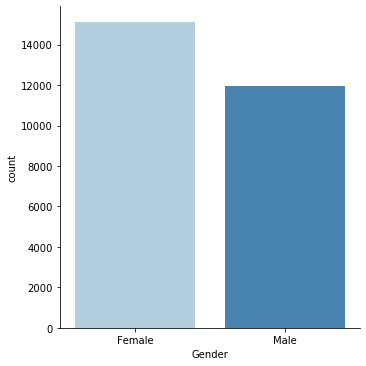

In [27]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

Text(0.5, 0.98, 'Do you hold an investment account?')

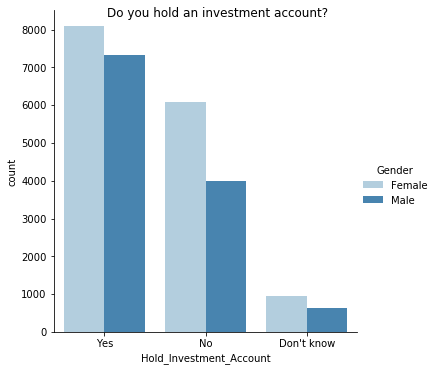

In [28]:
# who has access to an investment account

# create a clean column with labels
def investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Don't know"
        
df_sbs['Hold_Investment_Account'] = df_sbs.apply(lambda x: investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you hold an investment account?')

In [21]:
# what percentage of female respondents hold investment accounts?
df_sbs[['Gender','Hold_Investment_Account']].value_counts(normalize=True)

Gender  Hold_Investment_Account
Female  Yes                        0.195633
        Don't know                 0.191838
Male    Yes                        0.174619
        Don't know                 0.163023
Female  No                         0.161980
Male    No                         0.112907
dtype: float64

In [20]:
# what percentage of female respondents hold investment accounts?
df_sbs[['Gender','Hold_Investment_Account']].value_counts(normalize=False)

Gender  Hold_Investment_Account
Female  Yes                        21189
        Don't know                 20778
Male    Yes                        18913
        Don't know                 17657
Female  No                         17544
Male    No                         12229
dtype: int64

In [9]:
#df_sbs.groupby('Gender').Hold_Investment_Account.mean()
df_sbs.groupby('Gender').Hold_Investment_Account.count()

Gender
Female    59511
Male      48799
Name: Hold_Investment_Account, dtype: int64

In [24]:
df_sbs.groupby('Gender').NFCSID.nunique()

Gender
Female    59511
Male      48799
Name: NFCSID, dtype: int64

In [ ]:
%%timeit
df_sbs.groupby('Gender').sales_factor.mean()
df_sbs.groupby('Gender').sales_factor.count()
df_sbs.groupby('Gender').id.first()
3.05 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
%%timeit
df.groupby("city").agg({"sales_factor": ["mean", "count"], "id": "first"})
4.5 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)